# CO2, CH4 and N2O emissions pathways

In [1]:
# Import required Python modules
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Initialize years vector from 2000 to 2100 with 10-years intervals (11 values)

In [2]:
years = np.linspace(2000, 2100, 11)

Create emissions pathways (physical quantities, in million tons)  

*Decadal mean values (i.e. 2010 = average of 2005–2014)?*

In [3]:
data_CO2 = np.linspace(30000,0,11)        # CO2 emissions stop in 2100
data_CH4 = np.linspace(300, 300*0.5, 11)  # CH4 emissions reduced by half in 2100
data_N2O = np.linspace(12, 12*2/3, 11)    # N2O emissions reduced by a third in 2100

# Convert emissions in tCO2eq

### Convert CH4 emissions

Import GWP CH4 abacus for conversion

In [4]:
GWP_CH4_abacus = np.genfromtxt("data/GWP_CH4_abacus.csv", delimiter=",")

Convert CH4 emissions in million tons CO2 equivalent for time horizon 2100

In [5]:
data_CH4_tCO2eq = data_CH4 * GWP_CH4_abacus[1:12, 11]

Show converted values in MtCO2eq

In [6]:
data_CH4_tCO2eq

array([  8550. ,   8806.5,   9153. ,   9588. ,  10152. ,  10890. ,
        11907. ,  13279.5,  15102. ,  17193. ,  17940. ])

### Convert N2O emissions

Convert N2O emissions in million tons CO2 equivalent for time horizon 2100.  
GWP considered constant at 265 over the period.

In [7]:
data_N2O_tCO2eq = data_N2O * 265

Show converted values in MtCO2eq

In [8]:
data_N2O_tCO2eq

array([ 3180.,  3074.,  2968.,  2862.,  2756.,  2650.,  2544.,  2438.,
        2332.,  2226.,  2120.])

### Visualization

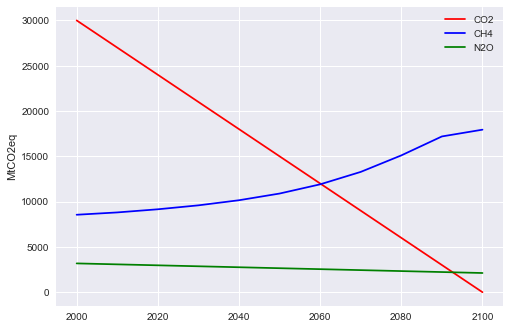

In [9]:
plt.subplot(1,1,1)

plt.plot(years, data_CO2, 'r', label='CO2')
plt.plot(years, data_CH4_tCO2eq, 'b', label='CH4')
plt.plot(years, data_N2O_tCO2eq, 'g', label='N2O')

plt.legend(loc=0)
plt.ylabel("MtCO2eq")

plt.show()

# Calculate the corresponding rise in average temperatures

Calculate total of GHG emissions by 2100

In [10]:
total_CO2 = (data_CO2[0]*5 + data_CO2[1:9].sum()*10 + data_CO2[10]*5)/1000
total_CH4 = (data_CH4_tCO2eq[0]*5 + data_CH4_tCO2eq[1:9].sum()*10 + data_CH4_tCO2eq[10]*5)/1000
total_N2O = (data_N2O_tCO2eq[0]*5 + data_N2O_tCO2eq[1:9].sum()*10 + data_N2O_tCO2eq[10]*5)/1000

total_GHG = total_CO2 + total_CH4 + total_N2O

print("The total amount of GHG emitted by 2100 is {0:.2f} GtCO2eq".format(total_GHG))

The total amount of GHG emitted by 2100 is 2733.97 GtCO2eq


Corresponding rise in average temperatures

In [11]:
t_rise = 0.444 * total_GHG / 1000

print("The corresponding rise in average temperature is {0:.2f}°C".format(t_rise))

The corresponding rise in average temperature is 1.21°C
